In [88]:
import numpy as np
import pandas as pd

import seaborn as sns
from seaborn import heatmap

import scipy.stats as stats

import matplotlib.pyplot as plt

df = pd.read_csv('data/steel-plates-fault.csv', sep=',')
df.rename(columns={'V1': 'X_Minimum'}, inplace=True)
df.rename(columns={'V2': 'X_Maximum'}, inplace=True)
df.rename(columns={'V3': 'Y_Minimum'}, inplace=True)
df.rename(columns={'V4': 'Y_Maximum'}, inplace=True)
df.rename(columns={'V5': 'Pixels_Areas'}, inplace=True)
df.rename(columns={'V6': 'X_Perimeter'}, inplace=True)
df.rename(columns={'V7': 'Y_Perimeter'}, inplace=True)
df.rename(columns={'V8': 'Sum_of_Luminosity'}, inplace=True)
df.rename(columns={'V9': 'Minimum_of_Luminosity'}, inplace=True)
df.rename(columns={'V10': 'Maximum_of_Luminosity'}, inplace=True)
df.rename(columns={'V11': 'Length_of_Conveyer'}, inplace=True)
df.rename(columns={'V12': 'TypesOfSteel_A300'}, inplace=True)
df.rename(columns={'V13': 'TypesOfSteel_A400'}, inplace=True)
df.rename(columns={'V14': 'Steel_Plate_Thickness'}, inplace=True)
df.rename(columns={'V15': 'Edges_Index'}, inplace=True)
df.rename(columns={'V16': 'Empty_Index'}, inplace=True)
df.rename(columns={'V17': 'Square_Index'}, inplace=True)
df.rename(columns={'V18': 'Outside_X_Index'}, inplace=True)
df.rename(columns={'V19': 'Edges_X_Index'}, inplace=True)
df.rename(columns={'V20': 'Edges_Y_Index'}, inplace=True)
df.rename(columns={'V21': 'Outside_Global_Index'}, inplace=True)
df.rename(columns={'V22': 'LogOfAreas'}, inplace=True)
df.rename(columns={'V23': 'Log_X_Index'}, inplace=True)
df.rename(columns={'V24': 'Log_Y_Index'}, inplace=True)
df.rename(columns={'V25': 'Orientation_Index'}, inplace=True)
df.rename(columns={'V26': 'Luminosity_Index'}, inplace=True)
df.rename(columns={'V27': 'SigmoidOfAreas'}, inplace=True)
df.rename(columns={'V28': 'Pastry'}, inplace=True)
df.rename(columns={'V29': 'Z_Scratch'}, inplace=True)
df.rename(columns={'V30': 'K_Scratch'}, inplace=True)
df.rename(columns={'V31': 'Stains'}, inplace=True)
df.rename(columns={'V32': 'Dirtiness'}, inplace=True)
df.rename(columns={'V33': 'Bumps'}, inplace=True)
df.rename(columns={'Class': 'Other_Faults_(Class)'}, inplace=True)
df

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scratch,Stains,Dirtiness,Bumps,Other_Faults_(Class)
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,1
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,1
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,1
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,1
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249,277,325780,325796,273,54,22,35033,119,141,...,-0.4286,0.0026,0.7254,0,0,0,0,0,0,2
1937,144,175,340581,340598,287,44,24,34599,112,133,...,-0.4516,-0.0582,0.8173,0,0,0,0,0,0,2
1938,145,174,386779,386794,292,40,22,37572,120,140,...,-0.4828,0.0052,0.7079,0,0,0,0,0,0,2
1939,137,170,422497,422528,419,97,47,52715,117,140,...,-0.0606,-0.0171,0.9919,0,0,0,0,0,0,2


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypesOfSteel_A300      1941 non-null   int64  
 12  TypesOfSteel_A400      1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

In [90]:
print("Duplicates (rows):", df.duplicated().sum())

Duplicates (rows): 0


In [91]:
df.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scratch,Stains,Dirtiness,Bumps,Other_Faults_(Class)
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,...,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,...,0.083288,-0.131305,0.585420,0.081401,0.097888,0.201443,0.037094,0.028336,0.207110,1.346728
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,...,0.500868,0.148767,0.339452,0.273521,0.297239,0.401181,0.189042,0.165973,0.405339,0.476051
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,...,-0.991000,-0.998900,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,...,-0.333300,-0.195000,0.248200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,...,0.095200,-0.133000,0.506300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,...,0.511600,-0.066600,0.999800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,...,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [92]:
num = df.select_dtypes(include='number')
corr_matrix = num.corr(method='pearson')
corr_matrix

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scratch,Stains,Dirtiness,Bumps,Other_Faults_(Class)
X_Minimum,1.000000,0.988314,0.041821,0.041807,-0.307322,-0.258937,-0.118757,-0.339045,0.237637,-0.075554,...,0.178585,-0.031578,-0.355251,0.134956,-0.228960,-0.419264,0.073740,0.103924,0.221296,0.164804
X_Maximum,0.988314,1.000000,0.052147,0.052135,-0.225399,-0.186326,-0.090138,-0.247052,0.168649,-0.062392,...,0.115019,-0.038996,-0.286736,0.119814,-0.258178,-0.336084,0.061471,0.096523,0.201704,0.145783
Y_Minimum,0.041821,0.052147,1.000000,1.000000,0.017670,0.023843,0.024150,0.007362,-0.065703,-0.067785,...,-0.086497,-0.090654,0.025257,0.036488,-0.063327,-0.000420,-0.066601,0.064262,0.126121,-0.084415
Y_Maximum,0.041807,0.052135,1.000000,1.000000,0.017840,0.024038,0.024380,0.007499,-0.065733,-0.067776,...,-0.086480,-0.090666,0.025284,0.036488,-0.063329,-0.000397,-0.066606,0.064262,0.126110,-0.084422
Pixels_Areas,-0.307322,-0.225399,0.017670,0.017840,1.000000,0.966644,0.827199,0.978952,-0.497204,0.110063,...,-0.137604,-0.043449,0.422947,-0.076752,-0.088440,0.556846,-0.071182,-0.050578,-0.163739,-0.184632
X_Perimeter,-0.258937,-0.186326,0.023843,0.024038,0.966644,1.000000,0.912436,0.912956,-0.400427,0.111363,...,-0.101731,-0.032617,0.380605,-0.075418,-0.060582,0.455003,-0.067547,-0.037820,-0.140197,-0.142903
Y_Perimeter,-0.118757,-0.090138,0.024150,0.024380,0.827199,0.912436,1.000000,0.704876,-0.213758,0.061809,...,0.031381,-0.047778,0.191772,-0.017616,-0.025721,0.203063,-0.035743,-0.010058,-0.070989,-0.066801
Sum_of_Luminosity,-0.339045,-0.247052,0.007362,0.007499,0.978952,0.912956,0.704876,1.000000,-0.540566,0.136515,...,-0.158483,-0.014067,0.464248,-0.084307,-0.099592,0.616950,-0.078111,-0.055272,-0.179831,-0.205890
Minimum_of_Luminosity,0.237637,0.168649,-0.065703,-0.065733,-0.497204,-0.400427,-0.213758,-0.540566,1.000000,0.429605,...,0.057123,0.669534,-0.514797,-0.074697,0.049905,-0.461000,0.183327,0.092765,0.078690,0.228112
Maximum_of_Luminosity,-0.075554,-0.062392,-0.067785,-0.067776,0.110063,0.111363,0.061809,0.136515,0.429605,1.000000,...,-0.169747,0.870160,-0.039651,-0.058742,-0.189441,0.185897,0.090456,0.022157,-0.047549,-0.007784


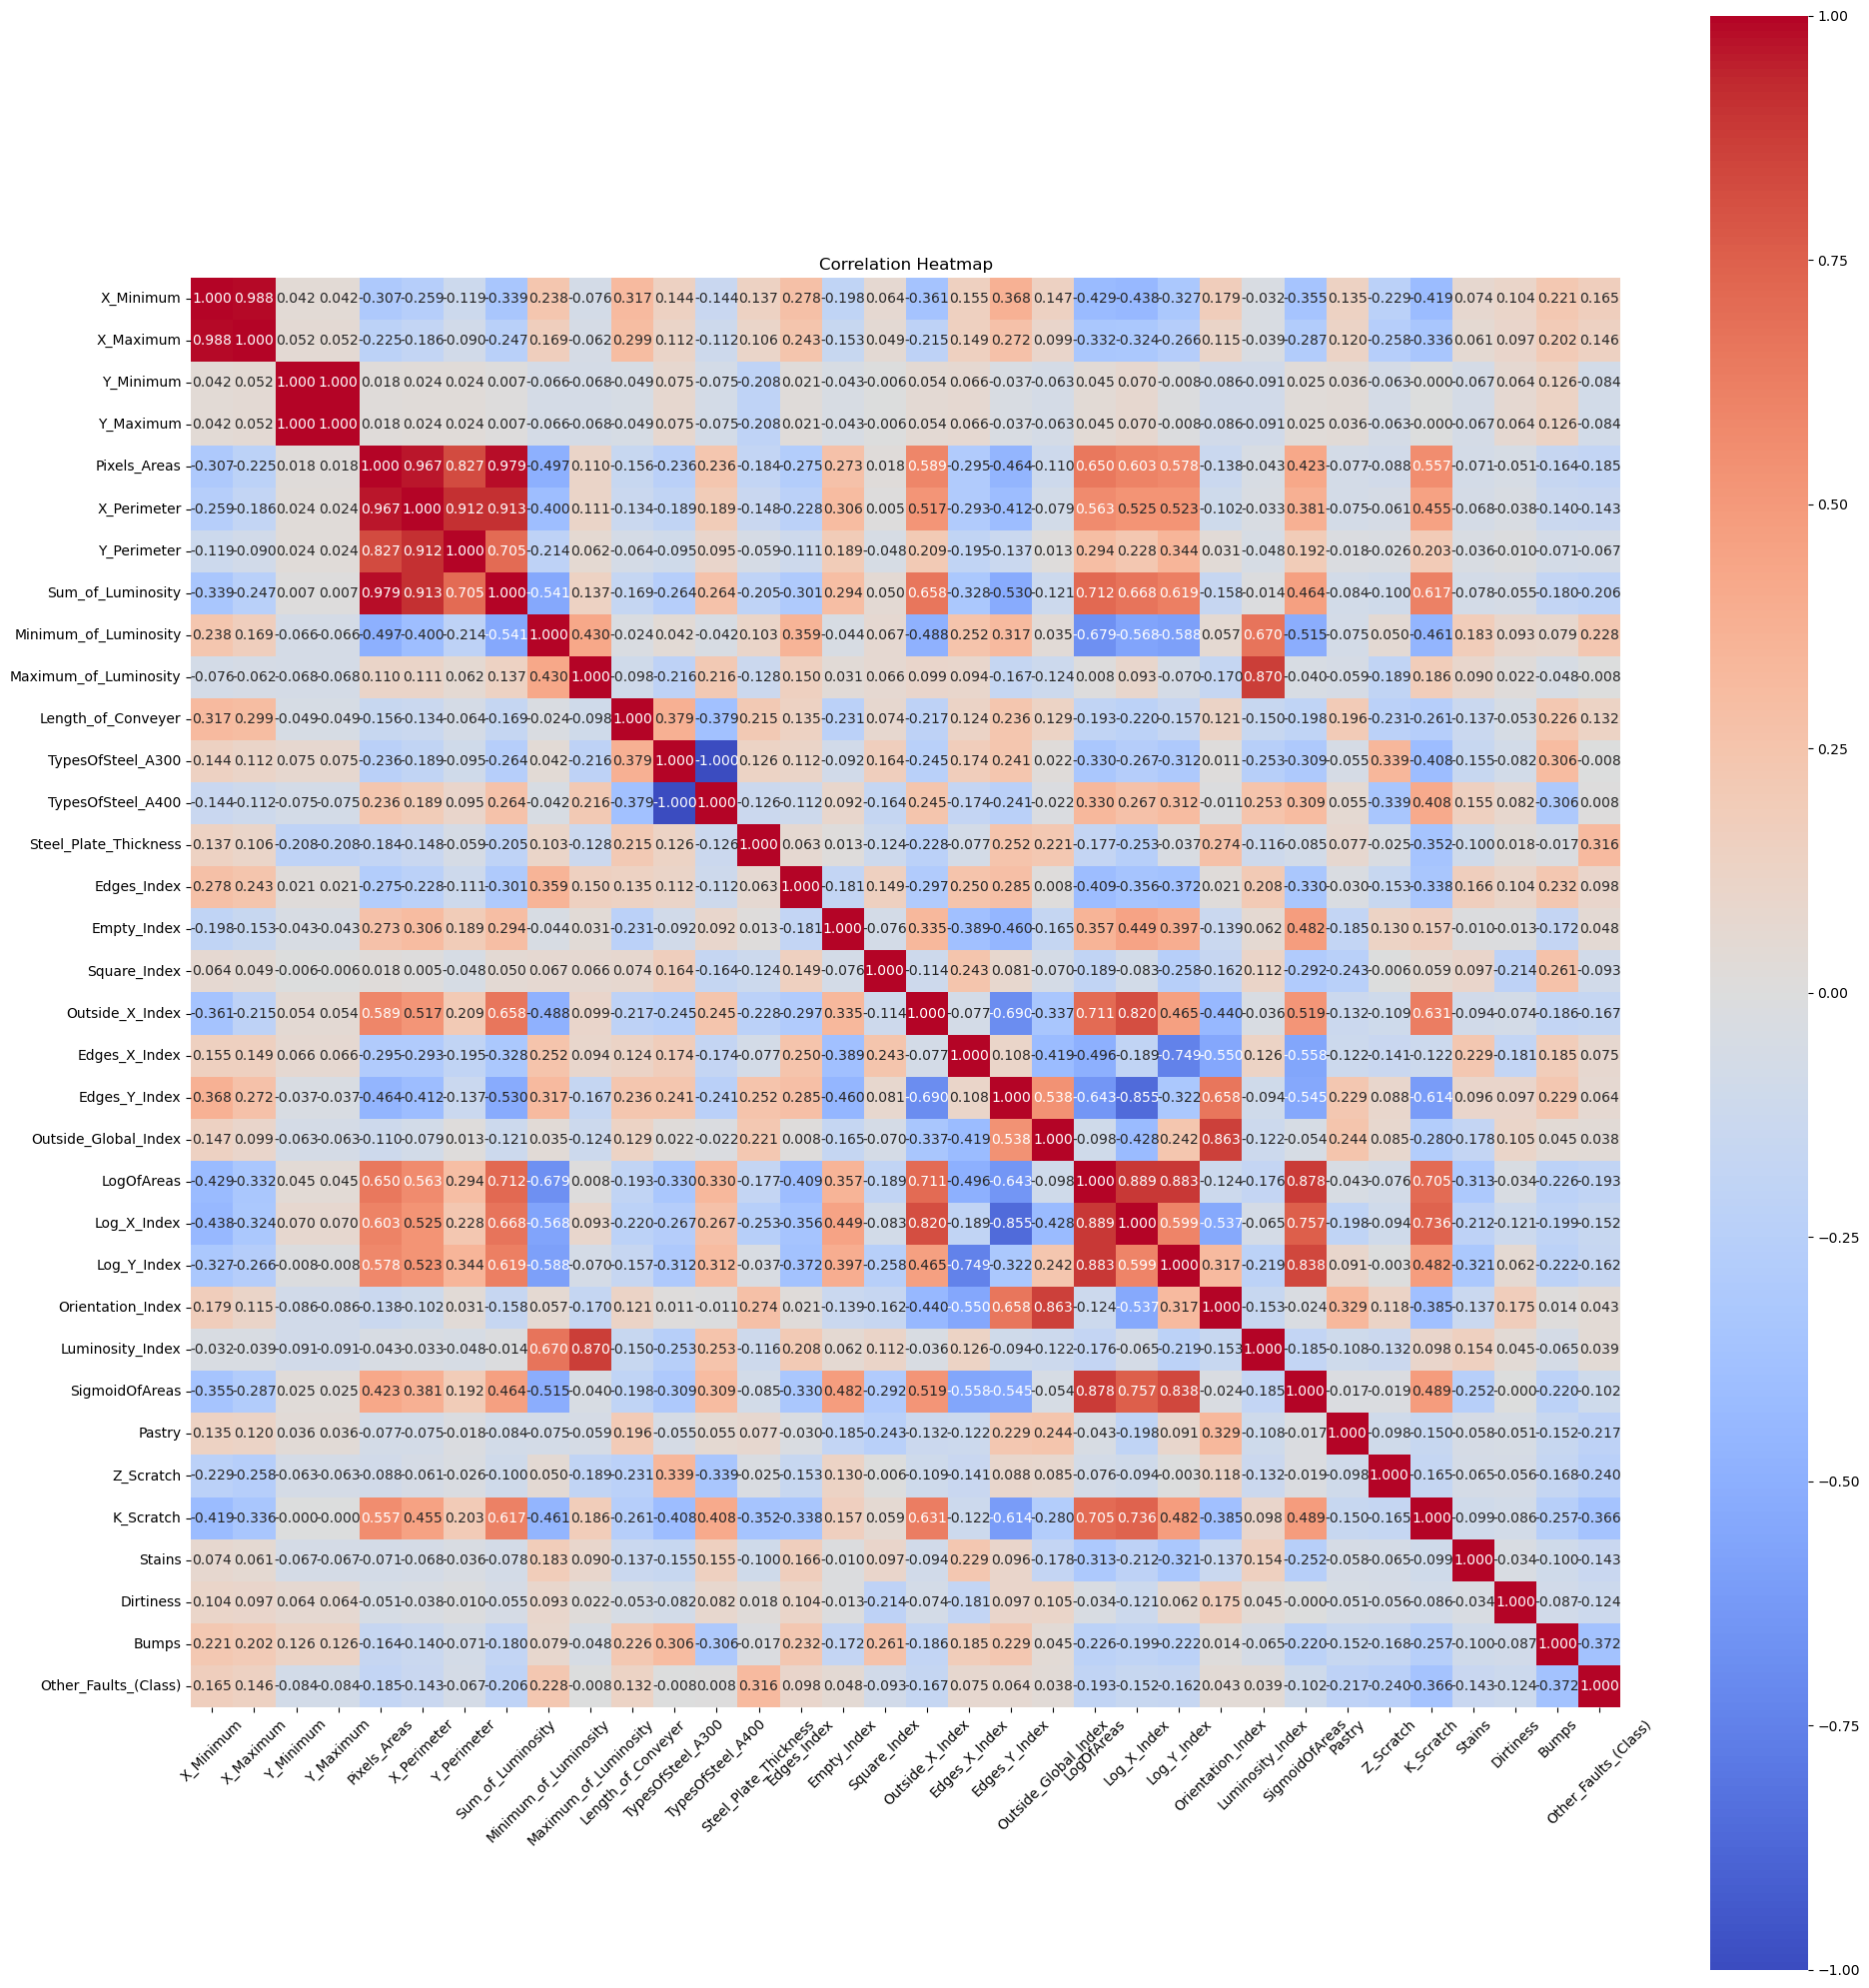

In [93]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, cmap='coolwarm', fmt=".3f", vmin=-1, vmax=1, center=0, annot=True, square=True)
plt.title("Correlation Heatmap")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

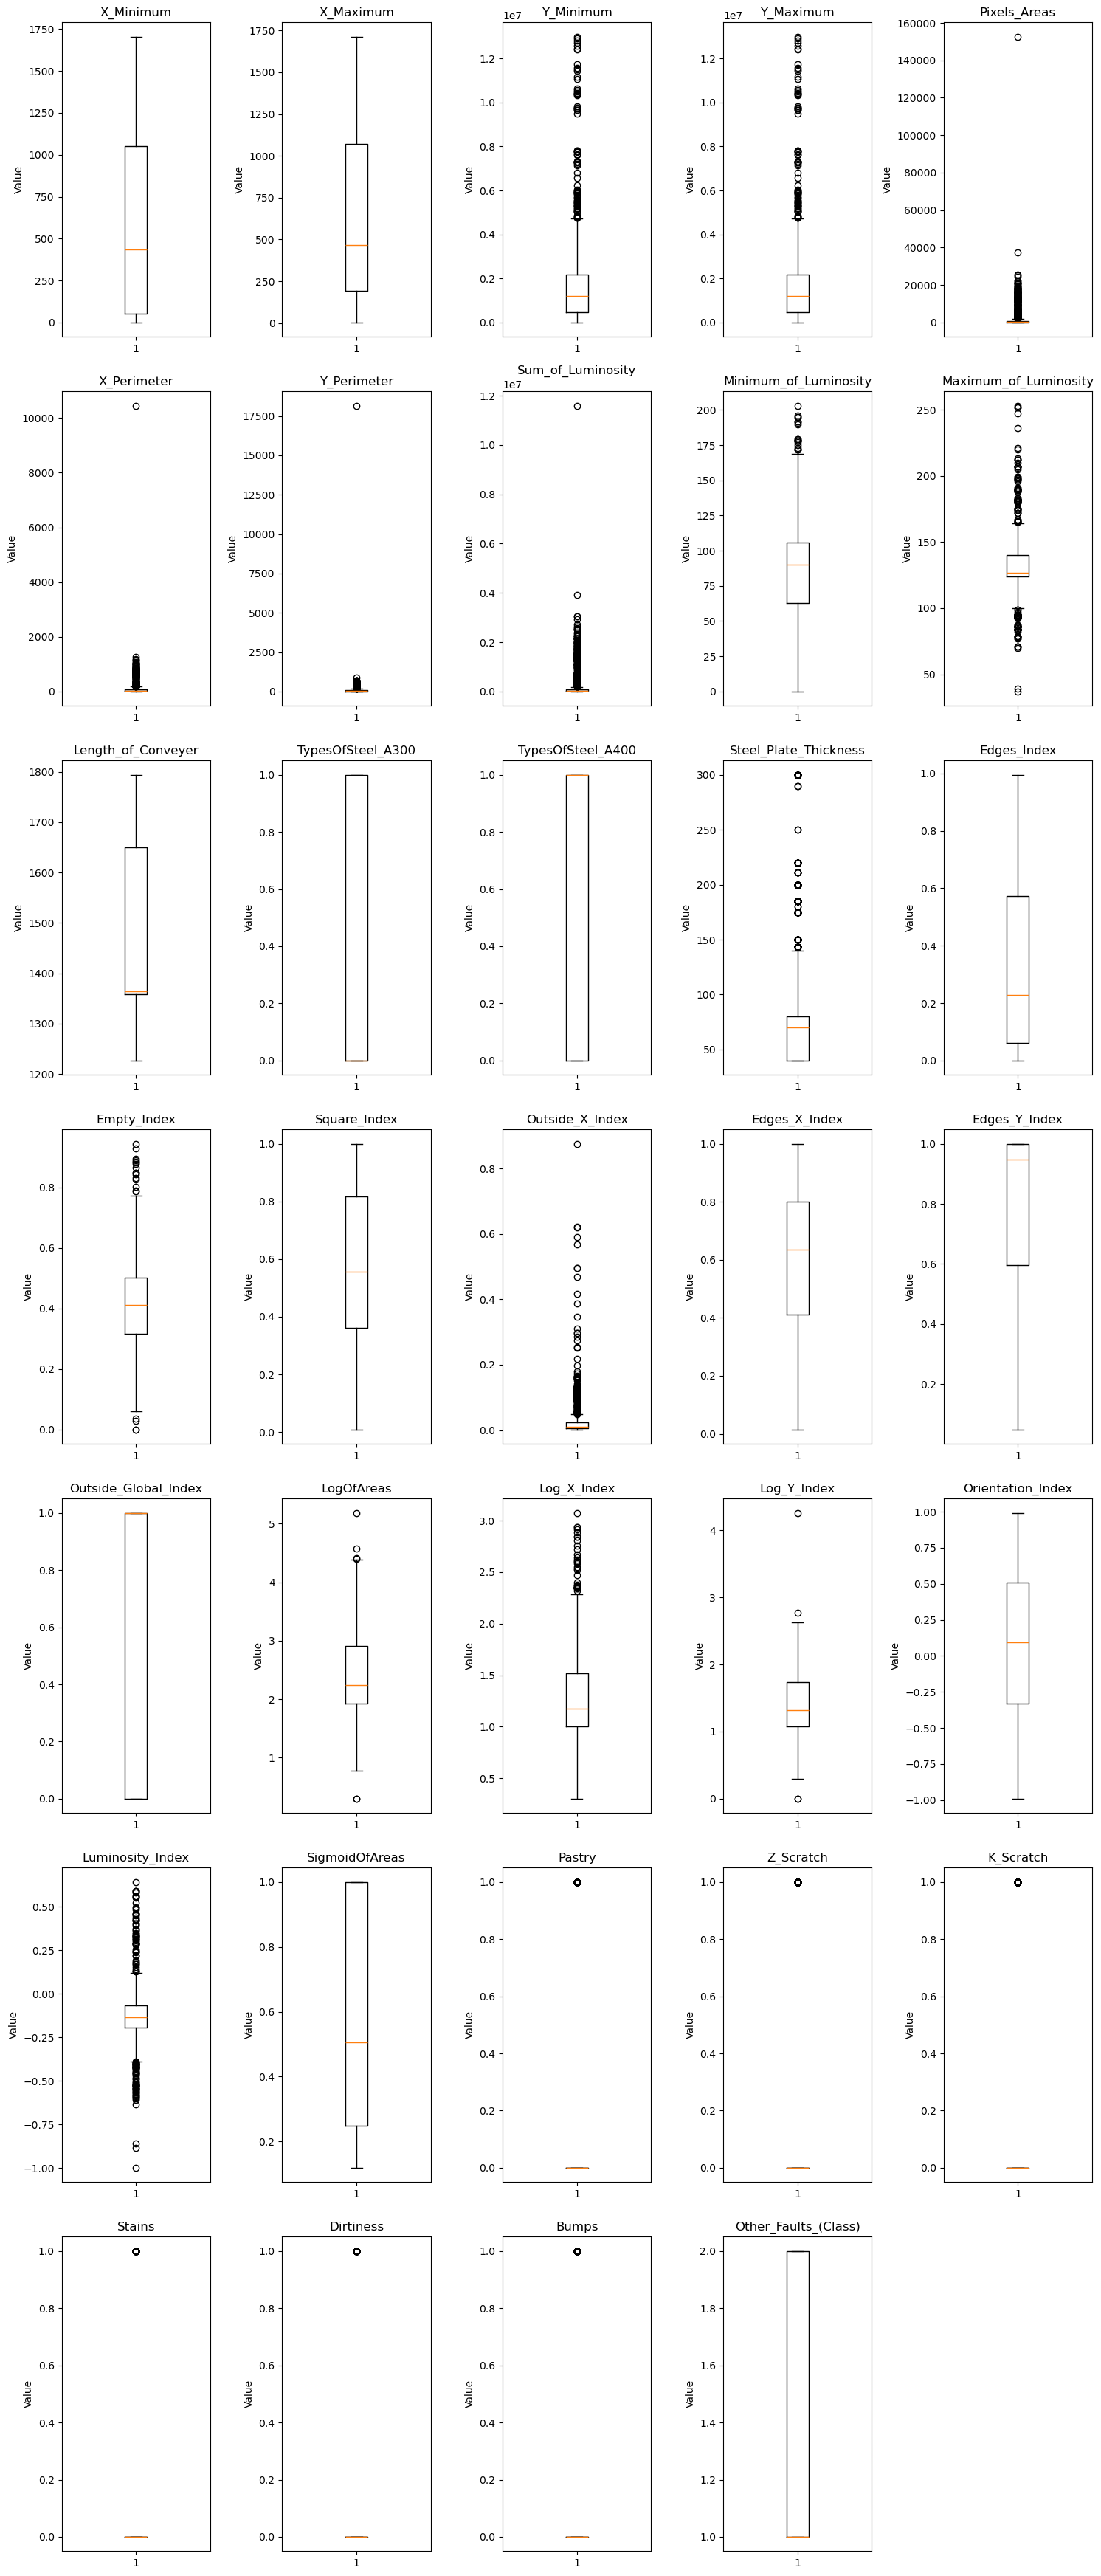

In [94]:
plt.figure()
nitems = len(df.columns)
ncols = 5
nrows = (nitems + ncols - 1) // ncols

fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    axes[i].boxplot(df[col].dropna())
    axes[i].set_title(col)
    axes[i].set_ylabel("Value")

for i in range(nitems, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Z-Score outlier detection

In [104]:
# All Columns except the ones we're predicting ('Pastry', 'Z_Scratch', 'K_Scratch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults_(Class)')
columns_to_check_outliers = [
    'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas', 'X_Perimeter',
    'Y_Perimeter', 'Sum_of_Luminosity', 'Minimum_of_Luminosity', 'Maximum_of_Luminosity',
    'Length_of_Conveyer', 'TypesOfSteel_A300', 'TypesOfSteel_A400', 'Steel_Plate_Thickness',
    'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index', 'Edges_X_Index',
    'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index',
    'Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas'
]
# Ignoring certain columns without outliers - as seen in the boxplots - to use a more aggressive outlier detection on the others
columns_to_ignore = [
    'X_Minimum', 'X_Maximum', 'Length_of_Conveyer', 'TypesOfSteel_A300', 'TypesOfSteel_A400',
    'Edges_Index','Square_Index','Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index',
    'Orientation_Index', 'SigmoidOfAreas'
]
columns_to_check_outliers = [col for col in columns_to_check_outliers if col not in columns_to_ignore]
print(columns_to_check_outliers)
z_score = stats.zscore(df[columns_to_check_outliers])
df_clean = df.copy()
df_clean = df_clean[(abs(z_score) < 3).all(axis=1)]

['Y_Minimum', 'Y_Maximum', 'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity', 'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Steel_Plate_Thickness', 'Empty_Index', 'Outside_X_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index', 'Luminosity_Index']


<Figure size 640x480 with 0 Axes>

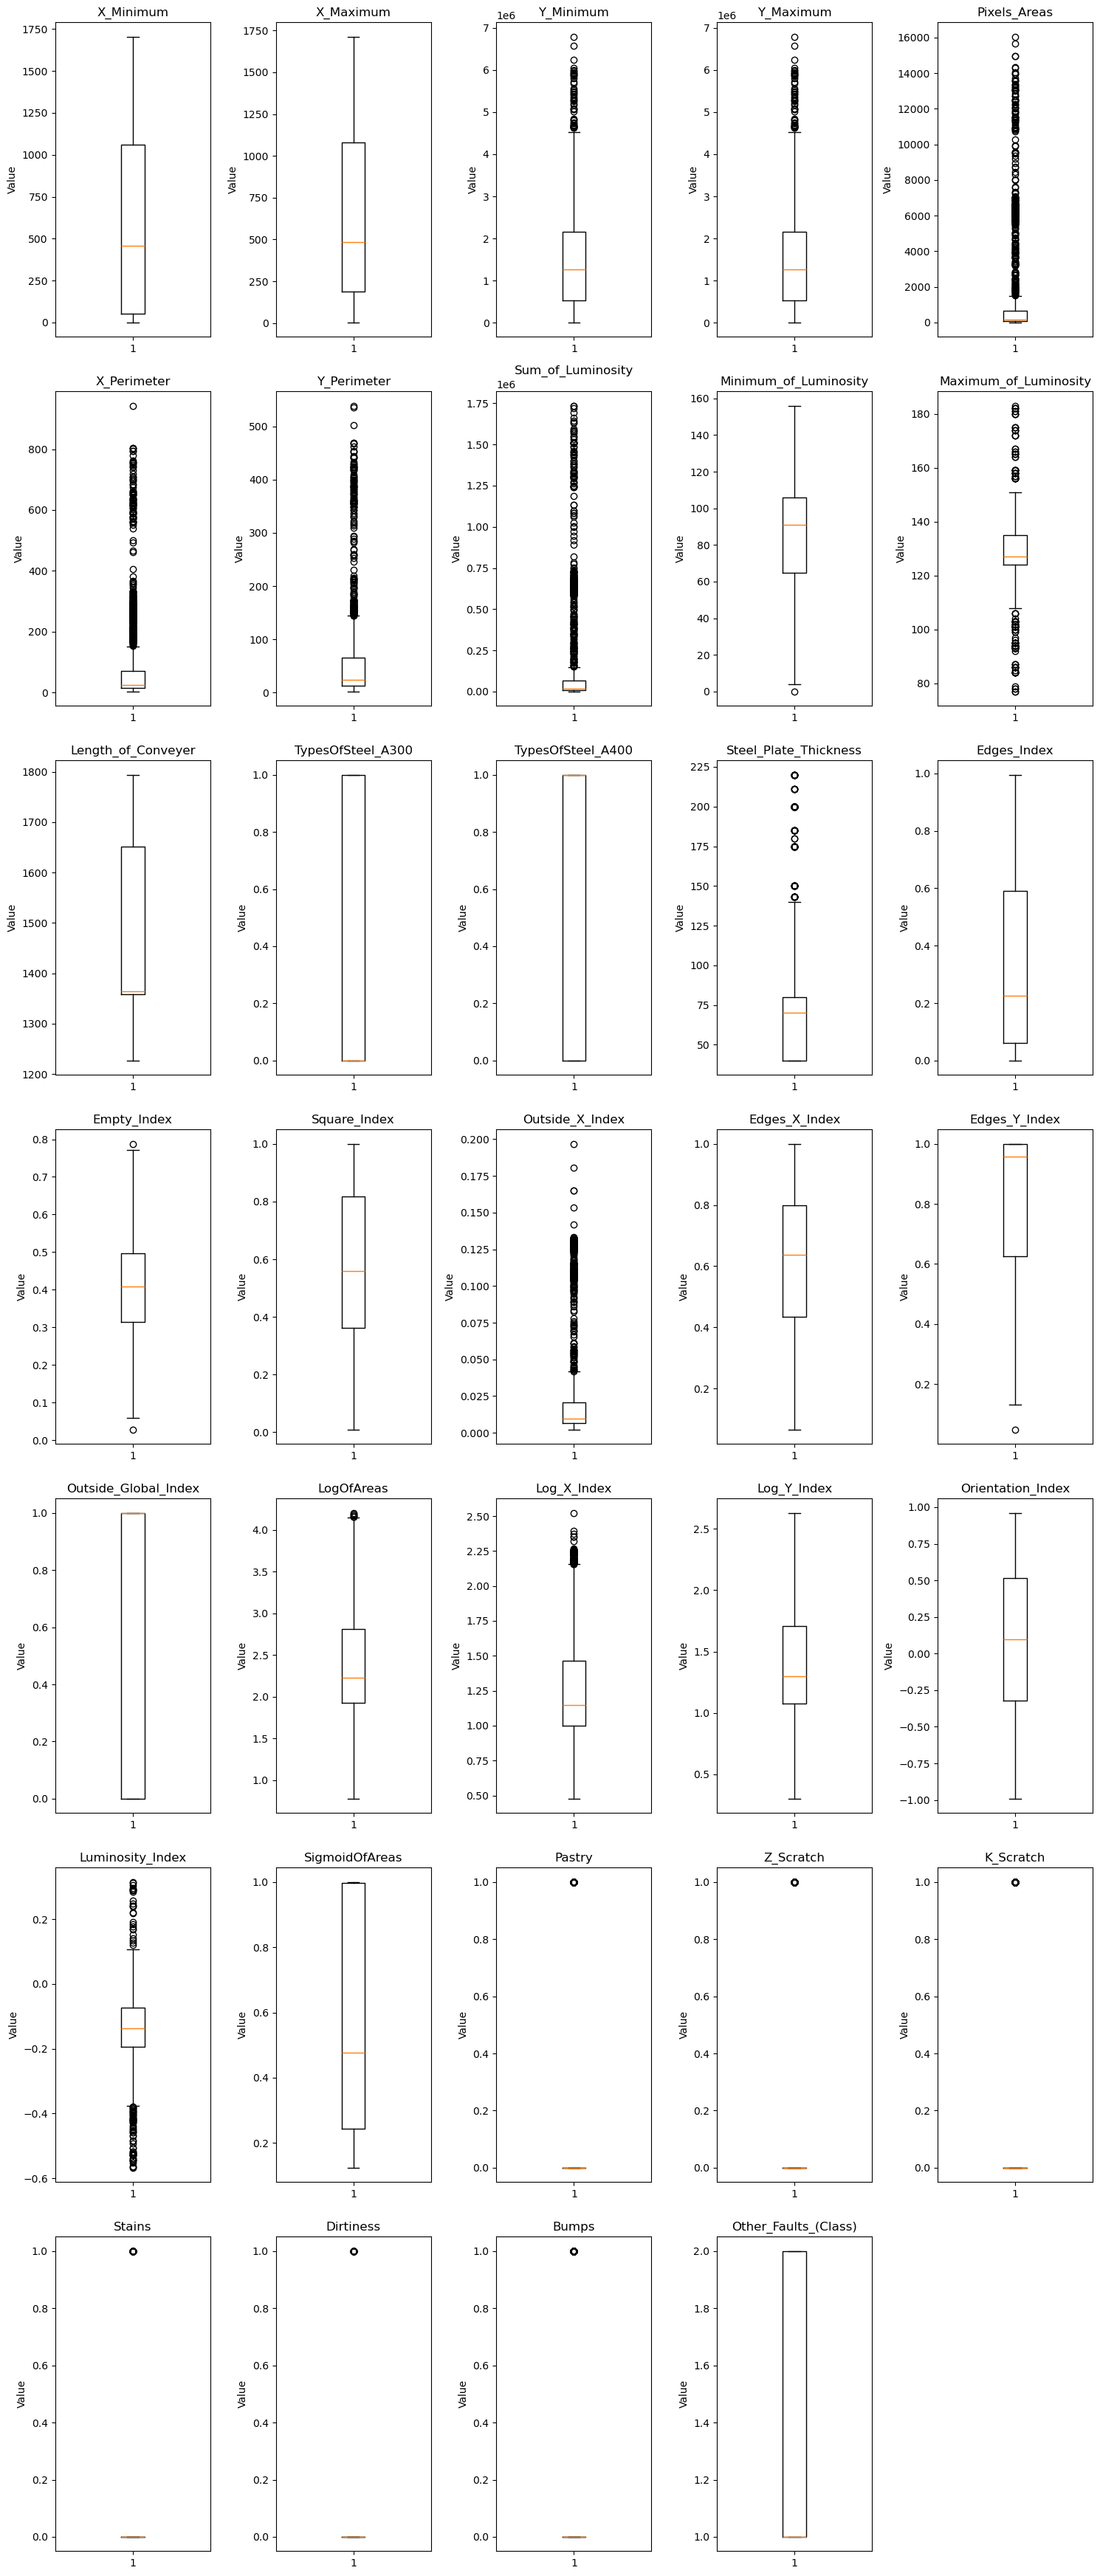

In [105]:
plt.figure()
nitems = len(df_clean.columns)
ncols = 5
nrows = (nitems + ncols - 1) // ncols

fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()

for i, col in enumerate(df_clean.columns):
    axes[i].boxplot(df_clean[col].dropna())
    axes[i].set_title(col)
    axes[i].set_ylabel("Value")

for i in range(nitems, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [106]:
df_clean.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scratch,Stains,Dirtiness,Bumps,Other_Faults_(Class)
count,1731.000000,1731.000000,1.731000e+03,1.731000e+03,1731.000000,1731.000000,1731.000000,1.731000e+03,1731.000000,1731.000000,...,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000
mean,579.002311,618.380127,1.520791e+06,1.520831e+06,1435.242634,88.428076,62.458117,1.555657e+05,84.800693,128.588677,...,0.086813,-0.139666,0.573636,0.084922,0.107452,0.178510,0.041594,0.031774,0.224726,1.331023
std,522.174294,501.426292,1.245581e+06,1.245580e+06,2909.735679,148.643858,91.497856,3.231355e+05,28.857035,13.940608,...,0.498573,0.118203,0.335827,0.278846,0.309777,0.383052,0.199718,0.175447,0.417522,0.470717
min,0.000000,4.000000,6.712000e+03,6.724000e+03,6.000000,3.000000,2.000000,7.180000e+02,0.000000,77.000000,...,-0.991000,-0.567800,0.124000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,53.500000,189.000000,5.207945e+05,5.208165e+05,84.000000,15.000000,13.000000,9.302000e+03,65.000000,124.000000,...,-0.319800,-0.195050,0.244500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,458.000000,486.000000,1.269420e+06,1.269438e+06,168.000000,25.000000,24.000000,1.832700e+04,91.000000,127.000000,...,0.095800,-0.138200,0.476300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1062.000000,1079.000000,2.155763e+06,2.155781e+06,654.000000,70.000000,65.500000,6.571150e+04,106.000000,135.000000,...,0.514300,-0.073000,0.997950,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,1705.000000,1713.000000,6.791894e+06,6.791907e+06,16052.000000,943.000000,539.000000,1.734628e+06,156.000000,183.000000,...,0.960700,0.314600,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


### Zhodnotenie Z-Score outlier detection
Napriek tomu, že Z-Score efektívne odstránil väčšinu outlierov, prišli sme o dáta, ktoré nám pomôžu predikovať Pastry, Z Scratch, Stains a Dirtiness a teda Z-Score ne neoptimálny v tomto prípade alebo v aktuálnej konfigurácii.

# Modifikovaná 5% 95% Metóda

In [107]:
# All Columns except the ones we're predicting ('Pastry', 'Z_Scratch', 'K_Scratch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults_(Class)')
columns_to_check_outliers = [
    'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas', 'X_Perimeter',
    'Y_Perimeter', 'Sum_of_Luminosity', 'Minimum_of_Luminosity', 'Maximum_of_Luminosity',
    'TypesOfSteel_A300', 'TypesOfSteel_A400', 'Steel_Plate_Thickness', 'Edges_Index',
    'Empty_Index', 'Square_Index', 'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index',
    'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index', 'Orientation_Index',
    'Luminosity_Index', 'SigmoidOfAreas'
]
# Ignoring certain columns without outliers - as seen in the boxplots - to use a more aggressive outlier detection on the others
columns_to_ignore = [
    'X_Minimum', 'X_Maximum', 'Length_of_Conveyer', 'TypesOfSteel_A300', 'TypesOfSteel_A400',
    'Edges_Index','Square_Index','Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index',
    'Orientation_Index', 'SigmoidOfAreas',
    # Ignoring columns that were well handled by Z-Score already
    'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Steel_Plate_Thickness', 'Empty_Index',
    'Log_X_Index', 'Log_Y_Index', 'Luminosity_Index'
]
columns_to_check_outliers = [col for col in columns_to_check_outliers if col not in columns_to_ignore]
print(columns_to_check_outliers)

shaving_ranges = [
    (0.0, 0.98), (0.0, 0.98), (0.0, 0.9), (0.0, 0.9), (0.0, 0.9), (0.0, 0.9), (0.0, 0.9), (0.0, 0.95)
]

for idx, col in enumerate(columns_to_check_outliers):
    lower = 0
    higher = 1
    df_CO_lower = df_clean[col].quantile(shaving_ranges[idx][lower])
    df_CO_upper = df_clean[col].quantile(shaving_ranges[idx][higher])
    
    df_clean[col] = df[col].where(
        (df_clean[col] >= df_CO_lower) & (df_clean[col] <= df_CO_upper)
    )
    df_clean.dropna(inplace = True)

['Y_Minimum', 'Y_Maximum', 'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity', 'Outside_X_Index', 'LogOfAreas']


<Figure size 640x480 with 0 Axes>

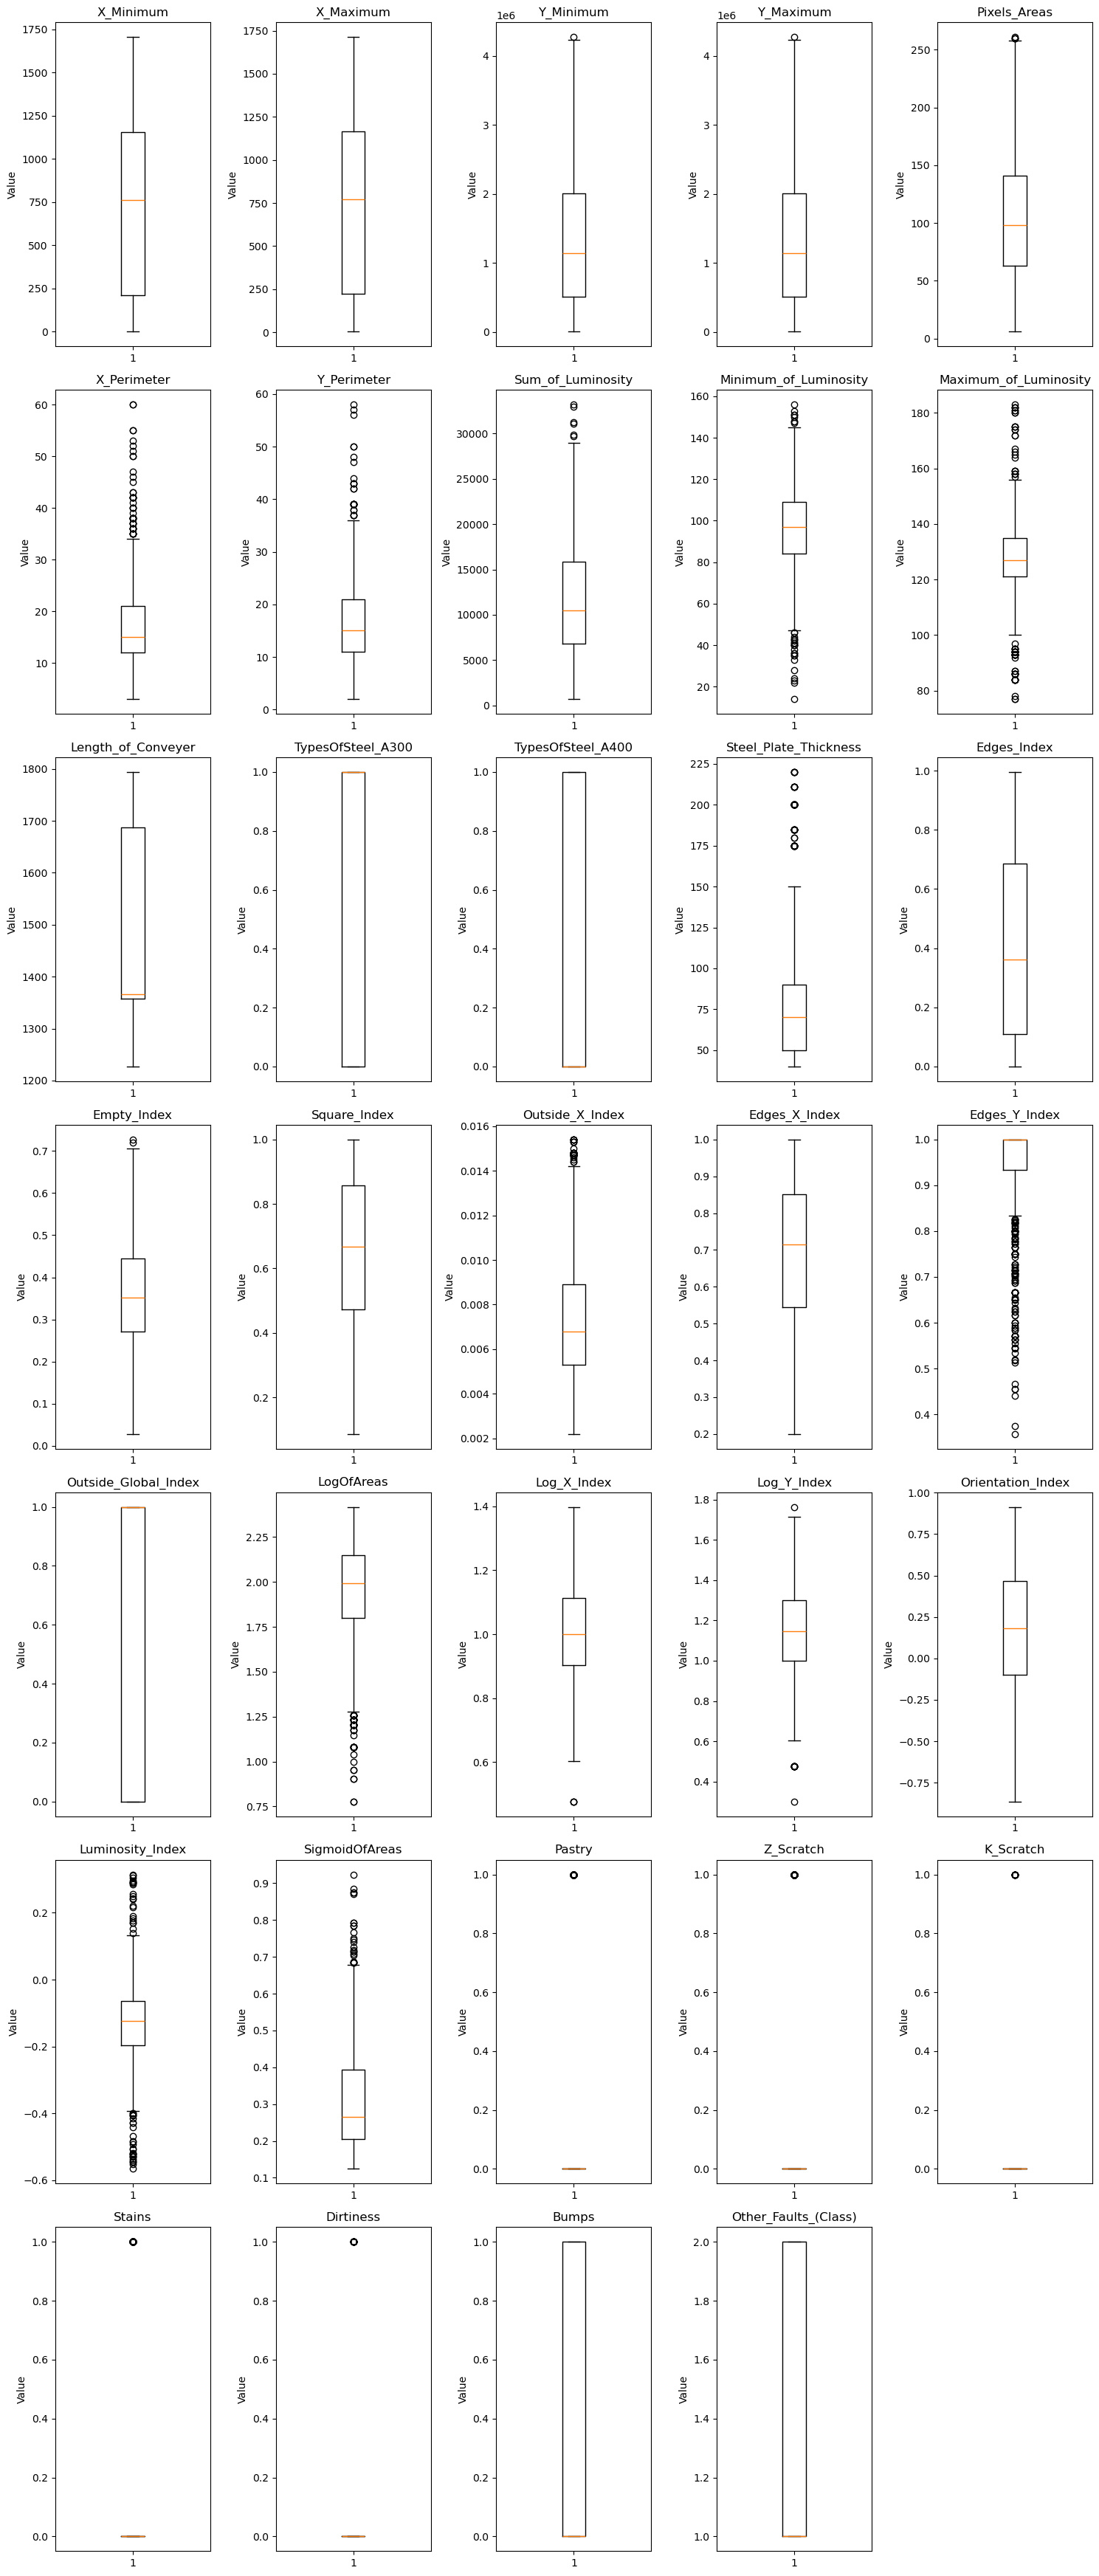

In [108]:
plt.figure()
nitems = len(df_clean.columns)
ncols = 5
nrows = (nitems + ncols - 1) // ncols

fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()

for i, col in enumerate(df_clean.columns):
    axes[i].boxplot(df_clean[col].dropna())
    axes[i].set_title(col)
    axes[i].set_ylabel("Value")

for i in range(nitems, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [109]:
df_clean.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scratch,Stains,Dirtiness,Bumps,Other_Faults_(Class)
count,936.000000,936.000000,9.360000e+02,9.360000e+02,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,...,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.00000
mean,722.879274,734.002137,1.367440e+06,1.367455e+06,106.259615,17.422009,16.719017,11635.150641,95.345085,127.706197,...,0.169064,-0.130635,0.313792,0.089744,0.121795,0.020299,0.075855,0.025641,0.298077,1.36859
std,507.324281,507.243162,1.052654e+06,1.052654e+06,58.457699,8.443350,8.748237,6426.536587,20.345401,14.864673,...,0.382048,0.125694,0.149975,0.285967,0.327224,0.141097,0.264907,0.158146,0.457658,0.48268
min,0.000000,4.000000,6.712000e+03,6.724000e+03,6.000000,3.000000,2.000000,718.000000,14.000000,77.000000,...,-0.863600,-0.566000,0.124000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,211.500000,224.750000,5.073485e+05,5.073595e+05,63.000000,12.000000,11.000000,6817.000000,84.000000,121.000000,...,-0.100000,-0.196775,0.205100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
50%,759.500000,771.500000,1.140582e+06,1.140593e+06,98.000000,15.000000,15.000000,10502.000000,97.000000,127.000000,...,0.181800,-0.124200,0.266000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
75%,1155.000000,1164.500000,2.004566e+06,2.004583e+06,141.250000,21.000000,21.000000,15867.500000,109.000000,135.000000,...,0.466700,-0.062750,0.394500,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.00000
max,1705.000000,1713.000000,4.270168e+06,4.270218e+06,261.000000,60.000000,58.000000,33183.000000,156.000000,183.000000,...,0.913800,0.314600,0.923600,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.00000
